/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Welcome to this app!
Please provide the path to the image file you want to check (e.g., 'test_anime.jpg').
Enter the file path: /content/test_1.jpg


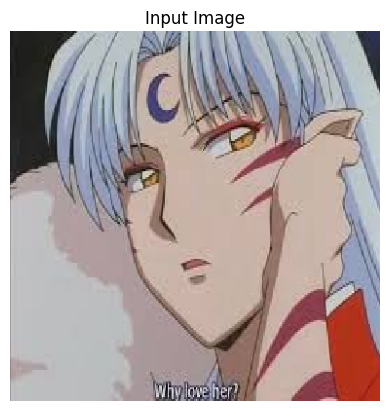

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
Predicted Class: Anime (Probability: 0.04)


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def predict_image(file_path, model, class_names):
    """
    Melakukan prediksi pada gambar baru.

    Args:
    - file_path (str): Path ke gambar yang akan diprediksi.
    - model (keras.Model): Model yang telah dilatih.
    - class_names (list): Daftar nama kelas dengan urutan tertentu.

    Returns:
    - str: Nama kelas yang diprediksi.
    """
    # Ukuran tetap 380x380
    img_height, img_width = 380, 380

    # Muat gambar dan preprocess
    img = tf.keras.utils.load_img(file_path, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img) / 255.0  # Normalisasi
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch

    # Visualisasi gambar
    plt.imshow(img)
    plt.title("Input Image")
    plt.axis("off")
    plt.show()

    # Prediksi probabilitas
    y_pred_prob = model.predict(img_array)[0][0]

    # Tentukan kelas berdasarkan threshold 0.5
    y_pred_class = 1 if y_pred_prob > 0.5 else 0

    # Ambil nama kelas
    y_pred_class_name = class_names[y_pred_class]

    # Cetak hasil prediksi
    print(f"Predicted Class: {y_pred_class_name} (Probability: {y_pred_prob:.2f})")

    return y_pred_class_name, y_pred_prob

# Muat model
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/model.h5')

# Daftar nama kelas sesuai urutan
class_names = ['Anime', 'Cartoon']

# Interaksi pengguna
print("Welcome to this app!")
print("Please provide the path to the image file you want to check (e.g., 'test_anime.jpg').")
file_path = input("Enter the file path: ")

# Validasi input pengguna
try:
    # Prediksi gambar
    predict_image(file_path, model, class_names)
except Exception as e:
    print(f"Error: Unable to process the file. Please check the file path or format.\nDetails: {e}")


In [2]:
from tensorflow.keras.models import load_model

# Muat model yang sudah dilatih
model = load_model('/content/drive/MyDrive/model.h5')

# Daftar nama kelas (binary)
class_names = ['Anime', 'Cartoon']  # 0: Cartoon, 1: Anime


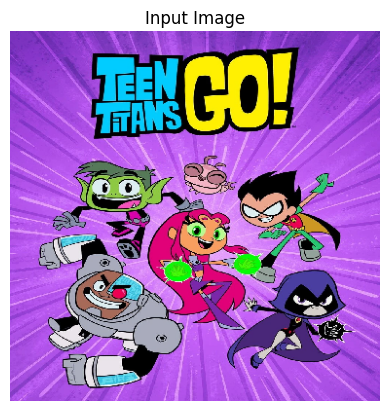

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
Predicted Class: Cartoon (Probability: 1.00)


('Cartoon', 0.99999785)

In [5]:
predict_image(file_path='/content/test_cartoon.jpg', model=model, class_names=class_names)